#### Classify the Size_Categorie using SVM:-
- month --> month of the year: 'jan' to 'dec' 
- day   --> day of the week: 'mon' to 'sun' 
- FFMC  --> FFMC index from the FWI system: 18.7 to 96.20 
- DMC   --> DMC index from the FWI system: 1.1 to 291.3 
- DC    --> DC index from the FWI system: 7.9 to 860.6 
- ISI   --> ISI index from the FWI system: 0.0 to 56.10 
- temp  --> temperature in Celsius degrees: 2.2 to 33.30 
- RH    --> relative humidity in %: 15.0 to 100 
- wind  --> wind speed in km/h: 0.40 to 9.40 
- rain  --> outside rain in mm/m2 : 0.0 to 6.4 
- Size_Categorie - the burned area of the forest (Small , Large)

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
forest_data = pd.read_csv('forestfires.csv')
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## 3. Data Analysis

In [3]:
forest_data.shape

(517, 31)

In [4]:
forest_data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
forest_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

## 4. Data Visualization

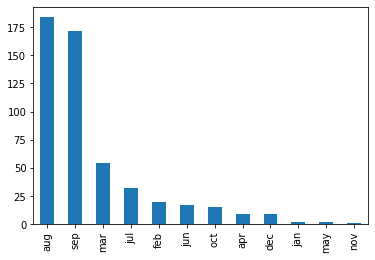

In [6]:
forest_data['month'].value_counts().plot(kind='bar')
plt.show()

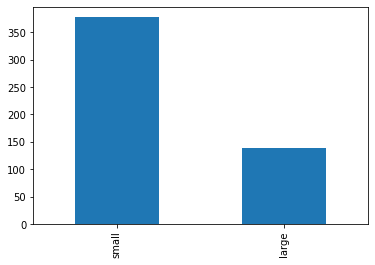

In [7]:
forest_data['size_category'].value_counts().plot(kind='bar')
plt.show()

## 5. Data Preparation

In [8]:
new_data = forest_data.drop(labels = ['month','day'],axis = 1)
new_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
new_data.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [10]:
new_data['size_category'].unique()

array(['small', 'large'], dtype=object)

In [11]:
new_data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [12]:
new_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***Label Encoder***

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data['size_category'] = le.fit_transform(new_data['size_category'])

In [14]:
new_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


#### *Visualizing new forest data*

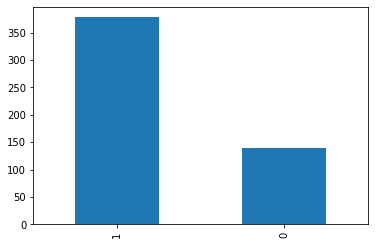

In [15]:
new_data['size_category'].value_counts().plot(kind = 'bar')
plt.show()

**Standardization of data**

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [17]:
array = new_data.values

In [18]:
scaled_data = min_max.fit_transform(array)

In [19]:
scaled_data

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.        , 0.        ,
        1.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 1.        , 0.        ,
        1.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.        , 0.        ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.        , 0.        ,
        1.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.        , 0.        ,
        1.        ]])

In [20]:
scaled_df = pd.DataFrame(scaled_data,columns=new_data.columns)
scaled_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
scaled_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Model Building

In [22]:
X = scaled_df.drop(labels = 'size_category',axis = 1)
y = scaled_df[['size_category']]

In [23]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
y.head()

,size_category
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify=y,shuffle=True)

In [26]:
X_train.shape, y_train.shape

((413, 28), (413, 1))

In [27]:
X_test.shape, y_test.shape

((104, 28), (104, 1))

## 7. Use Hyperparameter Tuning

In [28]:
svc_clf = SVC()

In [29]:
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[50,15,14,13,12,11,10,0.1,0.001]}]

In [30]:
from sklearn.model_selection import GridSearchCV 
grid_cv = GridSearchCV(svc_clf,param_grid,cv=10)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [31]:
grid_cv.best_params_

{'C': 0.1, 'gamma': 50, 'kernel': 'rbf'}

In [32]:
grid_cv.best_score_

0.7312427409988385

## 8. Model Training

In [33]:
svm_model = SVC(C=0.1,gamma=50,kernel='rbf')
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=50)

## 9. Model Testing

**Train data**

In [34]:
y_train_pred = svm_model.predict(X_train)

**Test data**

In [35]:
y_test_pred = svm_model.predict(X_test)

## 10. Model Validation

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Train data**

In [37]:
print("Accuracy score of Train data : ", round(accuracy_score(y_train,y_train_pred),3))

Accuracy score of Train data :  0.731


In [38]:
confusion_matrix(y_train,y_train_pred)

array([[  0, 111],
       [  0, 302]])

In [39]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       111
         1.0       0.73      1.00      0.84       302

    accuracy                           0.73       413
   macro avg       0.37      0.50      0.42       413
weighted avg       0.53      0.73      0.62       413



**Test data**

In [40]:
print("Accuracy score of Test data : ", round(accuracy_score(y_test,y_test_pred),3))

Accuracy score of Test data :  0.731


In [41]:
confusion_matrix(y_test,y_test_pred)

array([[ 0, 28],
       [ 0, 76]])

In [42]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.73      1.00      0.84        76

    accuracy                           0.73       104
   macro avg       0.37      0.50      0.42       104
weighted avg       0.53      0.73      0.62       104



## 11. Creating another model for Train-Test data

#### *1. Model Training*

In [43]:
svm_model2 = SVC(C=15,gamma=50,kernel='rbf')
svm_model2.fit(X_train,y_train)

SVC(C=15, gamma=50)

#### *2. Model Testing*

***Train data***

In [44]:
y_train_pred2 = svm_model2.predict(X_train)

***Test data***

In [45]:
y_test_pred2 = svm_model2.predict(X_test)

#### *3. Model Validation*

***Train data***

In [46]:
print("Accuracy score of train data by another model : ", round(accuracy_score(y_train,y_train_pred2),3))

Accuracy score of train data by another model :  0.983


In [47]:
confusion_matrix(y_train,y_train_pred2)

array([[104,   7],
       [  0, 302]])

In [48]:
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       111
         1.0       0.98      1.00      0.99       302

    accuracy                           0.98       413
   macro avg       0.99      0.97      0.98       413
weighted avg       0.98      0.98      0.98       413



***Test data***

In [49]:
print("Accuracy score of test data by another model : ", round(accuracy_score(y_test,y_test_pred2),3))

Accuracy score of test data by another model :  0.712


In [50]:
confusion_matrix(y_test,y_test_pred2)

array([[ 6, 22],
       [ 8, 68]])

In [51]:
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

         0.0       0.43      0.21      0.29        28
         1.0       0.76      0.89      0.82        76

    accuracy                           0.71       104
   macro avg       0.59      0.55      0.55       104
weighted avg       0.67      0.71      0.68       104



## 12. Model Building for actual data

In [52]:
new_data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
x_new = new_data.drop(labels = 'size_category',axis = 1)
y_new = new_data[['size_category']]

In [54]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.20, random_state=12)

In [55]:
x_new_train.shape, y_new_train.shape

((413, 28), (413, 1))

In [56]:
x_new_test, y_new_test.shape

(     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
 285  93.9  169.7  411.8  12.3  23.4  40   6.3   0.0   0.00       0  ...   
 206  93.5  139.4  594.2  20.3  22.9  31   7.2   0.0  15.45       0  ...   
 401  91.1   88.2  731.7   8.3  22.8  46   4.0   0.0   4.95       0  ...   
 435  90.8   84.7  376.6   5.6  23.8  51   1.8   0.0   0.00       0  ...   
 67   92.4  117.9  668.0  12.2  19.6  33   5.4   0.0   0.00       1  ...   
 ..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
 422  88.9  263.1  795.9   5.2  29.3  27   3.6   0.0   6.30       0  ...   
 37   90.0   41.5  682.6   8.7  11.3  60   5.4   0.0   0.00       1  ...   
 351  92.1   99.0  745.3   9.6  15.4  53   6.3   0.0   7.31       1  ...   
 317  92.4   96.2  739.4   8.6  19.2  24   4.9   0.0   3.78       0  ...   
 314  92.6  115.4  777.1   8.8  19.7  41   1.8   0.0   1.58       0  ...   
 
      monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
 285    

#### *1. Model Training*

In [57]:
svc_clf2 = SVC()

In [58]:
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001]}]

In [59]:
svm = GridSearchCV(svc_clf2,param_grid,cv = 10)
svm.fit(x_new_train, y_new_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [60]:
svm.best_estimator_

SVC(C=15, gamma=50)

In [61]:
svm.best_params_

{'C': 15, 'gamma': 50, 'kernel': 'rbf'}

In [62]:
svm.best_score_

0.7482578397212543

## 13. Creating another model for actual data

#### *1. Model Training*

In [63]:
svm_model3 = SVC(C=15,gamma=50,kernel='rbf')
svm_model3.fit(x_new_train, y_new_train)

SVC(C=15, gamma=50)

#### *2. Model Testing*

***Train data***

In [64]:
y_train_pred3 = svm_model3.predict(x_new_train)

***Test data***

In [65]:
y_test_pred3 = svm_model3.predict(x_new_test)

#### *3. Model Validation*

***Train data***

In [66]:
print("Accuracy score of train actual data by another model : ", round(accuracy_score(y_new_train,y_train_pred3),3))   

Accuracy score of train actual data by another model :  1.0


In [67]:
confusion_matrix(y_new_train,y_train_pred3)

array([[104,   0],
       [  0, 309]])

In [68]:
print(classification_report(y_new_train,y_train_pred3))   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00       309

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413



***Test data***

In [69]:
print("Accuracy score of test actual data by another model : ", round(accuracy_score(y_new_test,y_test_pred3),3))

Accuracy score of test actual data by another model :  0.673


In [70]:
confusion_matrix(y_new_test,y_test_pred3)

array([[ 1, 34],
       [ 0, 69]])

In [71]:
print(classification_report(y_new_test,y_test_pred3))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.67      1.00      0.80        69

    accuracy                           0.67       104
   macro avg       0.83      0.51      0.43       104
weighted avg       0.78      0.67      0.55       104



**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**